In [1]:
# Get rid of annoying tf warning
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import pickle
import numpy as np
np.set_printoptions(suppress=True)

import bayesflow as beef
import tensorflow as tf

import sys
sys.path.append("../")
from experiments import SmoothingExperiment, FilteringExperiment
sys.path.append("../../../assets/")
from models import MixtureRandomWalkDDM

/home/divergence/anaconda3/envs/bfPower/lib/python3.10/site-packages/bayesflow/trainers.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# gpu setting and checking
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
TRAIN_SMOOTHING_NETWORK = False
TRAIN_FILTERING_NETWORK = False

In [4]:
model = MixtureRandomWalkDDM()

INFO:root:Performing 2 pilot runs with the mixture_random_walk_ddm model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 800)
INFO:root:Shape of hyper_prior_draws batch after 2 pilot simulations: (batch_size = 2, 5)
INFO:root:Shape of local_prior_draws batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:No shared_prior_draws provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional prior non-batchable context provided.


# Training Smoothing Network

In [5]:
checkpoint = "checkpoints/smoothing_summary_network"

In [6]:
smoothing_experiment = SmoothingExperiment(model, checkpoint)

INFO:root:Loaded loss history from checkpoints/smoothing_summary_network/history_75.pkl.
INFO:root:Networks loaded from checkpoints/smoothing_summary_network/ckpt-75
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [7]:
if TRAIN_SMOOTHING_NETWORK:
    history = smoothing_experiment.run()
else:
    history = smoothing_experiment.trainer.loss_history.get_plottable()

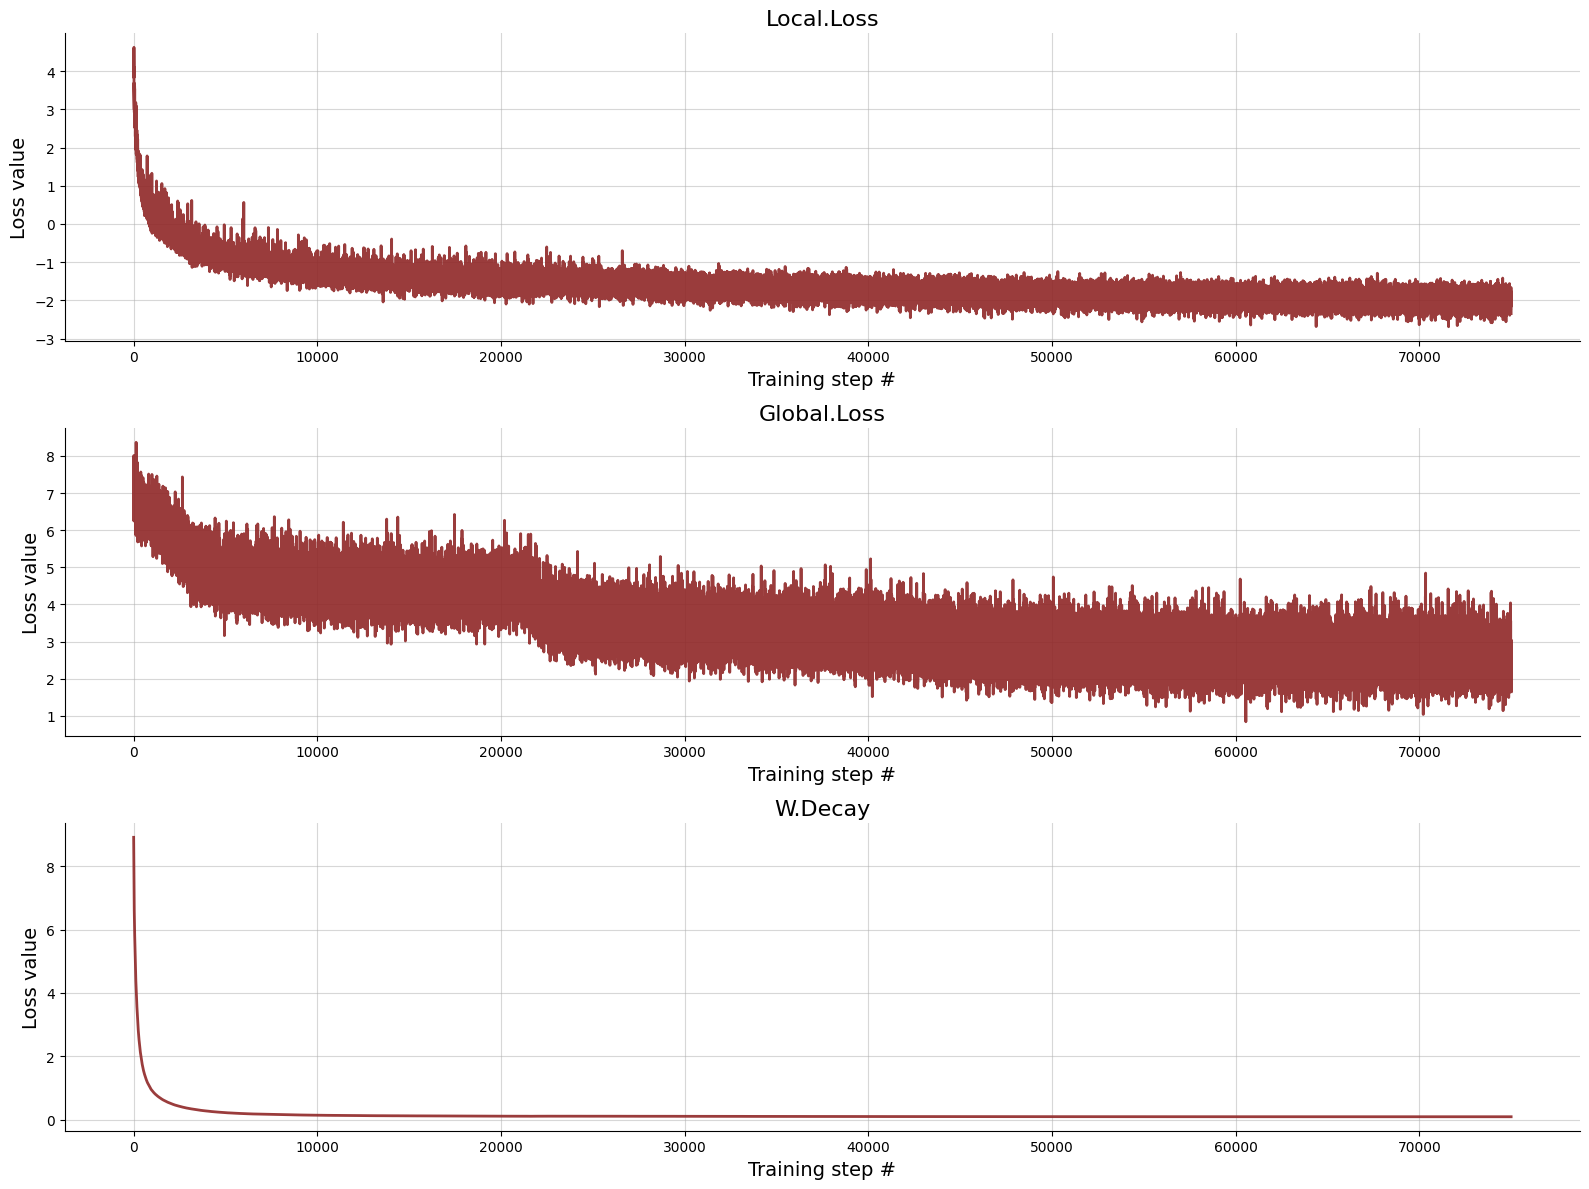

In [8]:
f = beef.diagnostics.plot_losses(history)

# Training Filtering Network

In [9]:
checkpoint = "checkpoints/filtering_summary_network"

In [10]:
filtering_experiment = FilteringExperiment(model, checkpoint)

INFO:root:Loaded loss history from checkpoints/filtering_summary_network/history_75.pkl.
INFO:root:Networks loaded from checkpoints/filtering_summary_network/ckpt-75
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [11]:
if TRAIN_FILTERING_NETWORK:
    history = filtering_experiment.run()
else:
    history = filtering_experiment.trainer.loss_history.get_plottable()

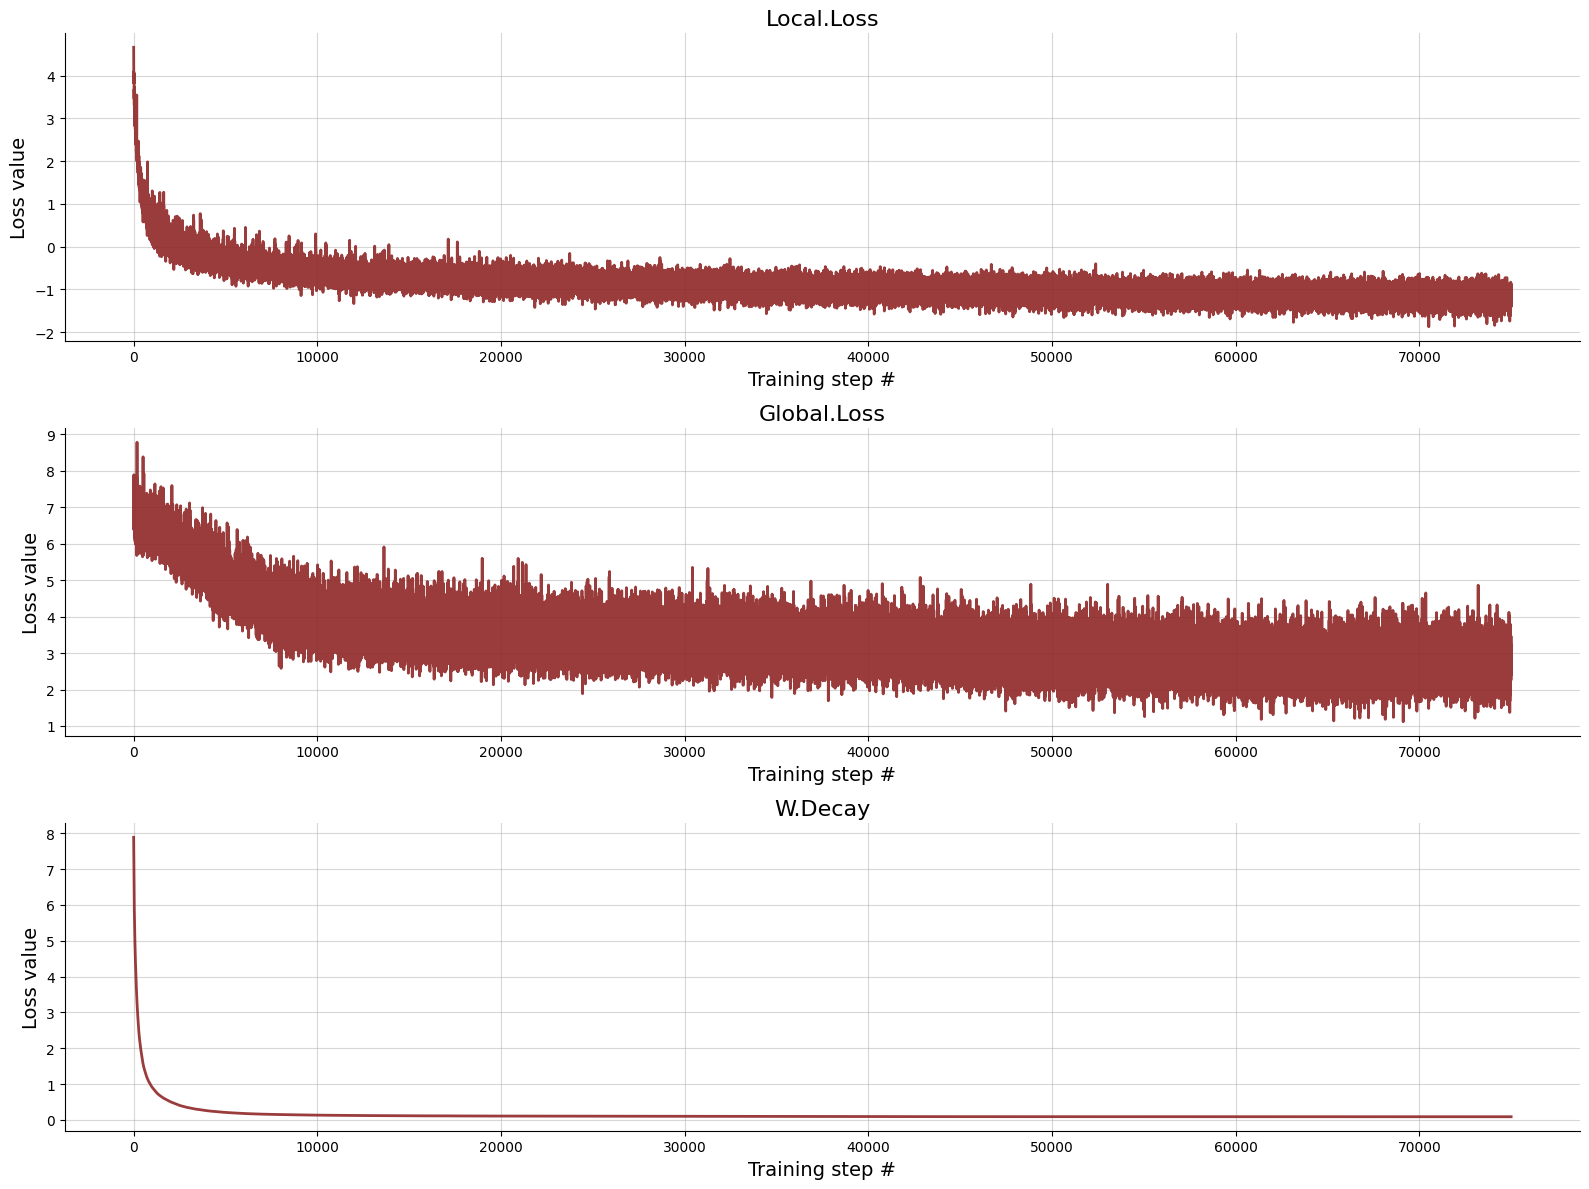

In [12]:
f = beef.diagnostics.plot_losses(history)